In [1]:
import sys
sys.path.append('..')

from nn import Model
from nn.layers import Dense, Dropout
from nn.optimizers import SGD, Adagrad, RMSProp, Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

np.set_printoptions(precision=3)
np.random.seed(1)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_train = X_train / 255
y_train = y_train

X_test = X_test.reshape((X_test.shape[0], -1))
X_test = X_test / 255

In [3]:
sgd = Model()
sgd.add(Dense(16, 'sigmoid', input_shape=(784,)))
sgd.add(Dense(10, 'softmax'))
sgd.compile(SGD(learning_rate=0.01))
sgd.fit(X_train, y_train, epochs=10, batch_size=32, verbose=False)

In [4]:
momentum = Model()
momentum.add(Dense(16, 'sigmoid', input_shape=(784,)))
momentum.add(Dense(10, 'softmax'))
momentum.compile(SGD(learning_rate=0.01, momentum=0.9))
momentum.fit(X_train, y_train, epochs=10, batch_size=32, verbose=False)

In [5]:
adagrad = Model()
adagrad.add(Dense(16, 'sigmoid', input_shape=(784,)))
adagrad.add(Dense(10, 'softmax'))
adagrad.compile(Adagrad(learning_rate=0.1))
adagrad.fit(X_train, y_train, epochs=10, batch_size=32, verbose=False)

In [6]:
rmsprop = Model()
rmsprop.add(Dense(16, 'sigmoid', input_shape=(784,)))
rmsprop.add(Dense(10, 'softmax'))
rmsprop.compile(RMSProp(learning_rate=0.01, rho=0.9))
rmsprop.fit(X_train, y_train, epochs=10, batch_size=32, verbose=False)

In [7]:
adam = Model()
adam.add(Dense(16, 'sigmoid', input_shape=(784,)))
adam.add(Dense(10, 'softmax'))
adam.compile(Adam(learning_rate=0.01, beta1=0.9, beta2=0.9))
adam.fit(X_train, y_train, epochs=10, batch_size=32, verbose=False)

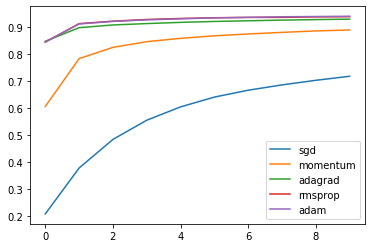

In [20]:
for model in [sgd, momentum, adagrad, rmsprop, adam]:
    plt.plot(model.scores['acc'])

plt.legend(['sgd', 'momentum', 'adagrad', 'rmsprop', 'adam'])
plt.show()

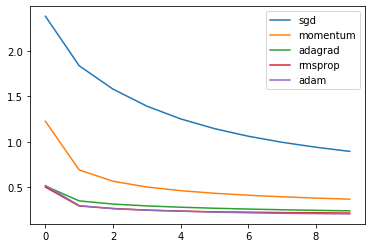

In [21]:
for model in [sgd, momentum, adagrad, rmsprop, adam]:
    plt.plot(model.scores['loss'])   

plt.legend(['sgd', 'momentum', 'adagrad', 'rmsprop', 'adam'])
plt.show()